<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%BE%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B2%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

# Пример данных: временные ряды (например, с датами и значениями)
# Допустим, df — это DataFrame с временными рядами, где 'timestamp' — это время, а 'value' — это значение временного ряда.

# Создаем искусственные данные
data = {
    'timestamp': pd.date_range(start="2020-01-01", periods=100, freq="D"),
    'value': np.random.randn(100) * 10 + 50  # случайные данные, близкие к нормальному распределению
}
df = pd.DataFrame(data)

# Добавим искусственные выбросы
df.loc[10, 'value'] = 150
df.loc[40, 'value'] = -100

# Применяем Isolation Forest
model = IsolationForest(contamination=0.1)  # contamination - процент выбросов
df['anomaly'] = model.fit_predict(df[['value']])

# Положительные значения (1) означают нормальные точки, а -1 — аномальные (выбросы)
df['anomaly'] = df['anomaly'].apply(lambda x: 'Normal' if x == 1 else 'Outlier')

# Печатаем результаты
print(df.head(15))


    timestamp       value  anomaly
0  2020-01-01   65.717441   Normal
1  2020-01-02   68.559973  Outlier
2  2020-01-03   46.806815   Normal
3  2020-01-04   45.596389   Normal
4  2020-01-05   61.354291   Normal
5  2020-01-06   45.509781   Normal
6  2020-01-07   46.595987   Normal
7  2020-01-08   49.614209   Normal
8  2020-01-09   44.890986   Normal
9  2020-01-10   40.090789   Normal
10 2020-01-11  150.000000  Outlier
11 2020-01-12   32.889826   Normal
12 2020-01-13   72.501354  Outlier
13 2020-01-14   65.194293   Normal
14 2020-01-15   49.394128   Normal


<Axes: xlabel='timestamp'>

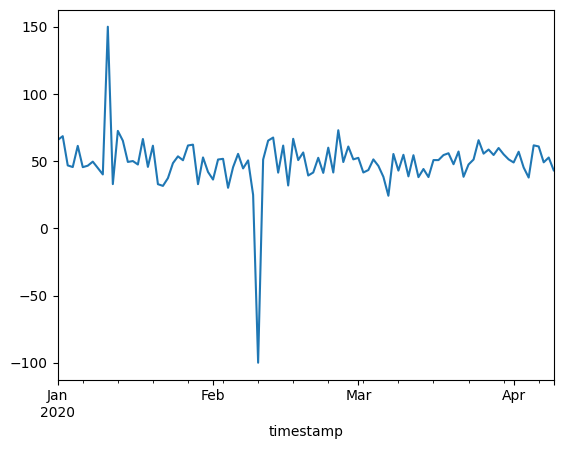

In [10]:
df.index= df['timestamp']
df['value'].plot()

In [11]:
from sklearn.svm import OneClassSVM

# Применяем One-Class SVM
svm_model = OneClassSVM(nu=0.1, kernel="rbf", gamma='scale')  # nu — процент выбросов
df['anomaly_svm'] = svm_model.fit_predict(df[['value']])

# Положительные значения (1) — нормальные, -1 — выбросы
df['anomaly_svm'] = df['anomaly_svm'].apply(lambda x: 'Normal' if x == 1 else 'Outlier')

# Печатаем результаты
print(df.head(15))


            timestamp       value  anomaly anomaly_svm
timestamp                                             
2020-01-01 2020-01-01   65.717441   Normal      Normal
2020-01-02 2020-01-02   68.559973  Outlier     Outlier
2020-01-03 2020-01-03   46.806815   Normal      Normal
2020-01-04 2020-01-04   45.596389   Normal      Normal
2020-01-05 2020-01-05   61.354291   Normal      Normal
2020-01-06 2020-01-06   45.509781   Normal      Normal
2020-01-07 2020-01-07   46.595987   Normal      Normal
2020-01-08 2020-01-08   49.614209   Normal      Normal
2020-01-09 2020-01-09   44.890986   Normal      Normal
2020-01-10 2020-01-10   40.090789   Normal      Normal
2020-01-11 2020-01-11  150.000000  Outlier     Outlier
2020-01-12 2020-01-12   32.889826   Normal      Normal
2020-01-13 2020-01-13   72.501354  Outlier     Outlier
2020-01-14 2020-01-14   65.194293   Normal      Normal
2020-01-15 2020-01-15   49.394128   Normal      Normal


In [13]:
import statsmodels.api as sm

# Подгоняем модель ARIMA (например, ARIMA(1, 1, 1))
model = sm.tsa.ARIMA(df['value'], order=(1, 1, 1))
model_fit = model.fit()

# Прогнозируем
df['forecast'] = model_fit.predict(start=0, end=len(df)-1)

# Вычисляем отклонения от прогноза
df['residuals'] = np.abs(df['value'] - df['forecast'])

# Применяем порог на основе стандартного отклонения
threshold = df['residuals'].std() * 2
df['anomaly_arima'] = df['residuals'].apply(lambda x: 'Outlier' if x > threshold else 'Normal')

# Печатаем результаты
df.head(15)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,timestamp,value,anomaly,anomaly_svm,forecast,residuals,anomaly_arima
timestamp,,,,,,,
2020-01-01,2020-01-01,65.717441,Normal,Normal,0.000000,65.717441,Outlier
2020-01-02,2020-01-02,68.559973,Outlier,Outlier,65.690419,2.869555,Normal
2020-01-03,2020-01-03,46.806815,Normal,Normal,67.160190,20.353375,Normal
2020-01-04,2020-01-04,45.596389,Normal,Normal,59.945714,14.349325,Normal
2020-01-05,2020-01-05,61.354291,Normal,Normal,56.373943,4.980348,Normal
2020-01-06,2020-01-06,45.509781,Normal,Normal,57.754797,12.245016,Normal
2020-01-07,2020-01-07,46.595987,Normal,Normal,55.334259,8.738273,Normal
2020-01-08,2020-01-08,49.614209,Normal,Normal,54.122331,4.508122,Normal
2020-01-09,2020-01-09,44.890986,Normal,Normal,53.638096,8.747111,Normal


In [15]:
from sklearn.cluster import KMeans

# Применяем KMeans для кластеризации
kmeans = KMeans(n_clusters=2)  # Два кластера: нормальные и выбросы
df['cluster'] = kmeans.fit_predict(df[['value']])

# Определяем выбросы как точки, которые находятся на границе кластеров
df['anomaly_kmeans'] = df['cluster'].apply(lambda x: 'Outlier' if x == 1 else 'Normal')

# Печатаем результаты
df.head(15)


,timestamp,value,anomaly,anomaly_svm,forecast,residuals,anomaly_arima,cluster,anomaly_kmeans
timestamp,,,,,,,,,
2020-01-01,2020-01-01,65.717441,Normal,Normal,0.000000,65.717441,Outlier,0,Normal
2020-01-02,2020-01-02,68.559973,Outlier,Outlier,65.690419,2.869555,Normal,0,Normal
2020-01-03,2020-01-03,46.806815,Normal,Normal,67.160190,20.353375,Normal,0,Normal
2020-01-04,2020-01-04,45.596389,Normal,Normal,59.945714,14.349325,Normal,0,Normal
2020-01-05,2020-01-05,61.354291,Normal,Normal,56.373943,4.980348,Normal,0,Normal
2020-01-06,2020-01-06,45.509781,Normal,Normal,57.754797,12.245016,Normal,0,Normal
2020-01-07,2020-01-07,46.595987,Normal,Normal,55.334259,8.738273,Normal,0,Normal
2020-01-08,2020-01-08,49.614209,Normal,Normal,54.122331,4.508122,Normal,0,Normal
2020-01-09,2020-01-09,44.890986,Normal,Normal,53.638096,8.747111,Normal,0,Normal


In [16]:
from sklearn.neighbors import LocalOutlierFactor

# Применяем LOF для поиска выбросов
lof = LocalOutlierFactor(n_neighbors=20)
df['anomaly_lof'] = lof.fit_predict(df[['value']])

# Положительные значения (1) — нормальные, -1 — выбросы
df['anomaly_lof'] = df['anomaly_lof'].apply(lambda x: 'Normal' if x == 1 else 'Outlier')

# Печатаем результаты
df.head(15)


,timestamp,value,anomaly,anomaly_svm,forecast,residuals,anomaly_arima,cluster,anomaly_kmeans,anomaly_lof
timestamp,,,,,,,,,,
2020-01-01,2020-01-01,65.717441,Normal,Normal,0.000000,65.717441,Outlier,0,Normal,Normal
2020-01-02,2020-01-02,68.559973,Outlier,Outlier,65.690419,2.869555,Normal,0,Normal,Normal
2020-01-03,2020-01-03,46.806815,Normal,Normal,67.160190,20.353375,Normal,0,Normal,Normal
2020-01-04,2020-01-04,45.596389,Normal,Normal,59.945714,14.349325,Normal,0,Normal,Normal
2020-01-05,2020-01-05,61.354291,Normal,Normal,56.373943,4.980348,Normal,0,Normal,Normal
2020-01-06,2020-01-06,45.509781,Normal,Normal,57.754797,12.245016,Normal,0,Normal,Normal
2020-01-07,2020-01-07,46.595987,Normal,Normal,55.334259,8.738273,Normal,0,Normal,Normal
2020-01-08,2020-01-08,49.614209,Normal,Normal,54.122331,4.508122,Normal,0,Normal,Normal
2020-01-09,2020-01-09,44.890986,Normal,Normal,53.638096,8.747111,Normal,0,Normal,Normal


In [17]:
# Нормализуем данные для автоенкодера
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['scaled_value'] = scaler.fit_transform(df[['value']])

# Преобразуем в массив для подачи в нейронную сеть
X = df['scaled_value'].values.reshape(-1, 1)
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers

# Размерность входных данных
input_dim = X.shape[1]

# Энкодер
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

# Декодер
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Автоенкодер
autoencoder = Model(input_layer, decoded)

# Компиляция модели
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель
autoencoder.fit(X, X, epochs=50, batch_size=16, validation_split=0.1, verbose=1)
# Получаем восстановленные значения (выходные данные автоенкодера)
reconstructed = autoencoder.predict(X)

# Вычисляем ошибку восстановления (среднеквадратичную ошибку)
reconstruction_error = np.mean(np.square(X - reconstructed), axis=1)

# Мы можем задать порог, который будет определять выбросы
threshold = np.percentile(reconstruction_error, 95)  # 95-й перцентиль для порога

# На основе порога помечаем выбросы
df['anomaly_autoencoder'] = reconstruction_error > threshold

# Печатаем результаты
df['anomaly_autoencoder'] = df['anomaly_autoencoder'].apply(lambda x: 'Outlier' if x else 'Normal')

print(df[['timestamp', 'value', 'anomaly_autoencoder']].head(15))


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0179 - val_loss: 0.0067
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0101 - val_loss: 0.0026
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0087 - val_loss: 7.2412e-04
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0097 - val_loss: 8.0886e-04
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0110 - val_loss: 7.1953e-04
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0050 - val_loss: 7.5414e-04
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0050 - val_loss: 6.8806e-04
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - val_loss: 6.7301e-04
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0063 - val_loss: 6.6369e-04
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0034 - val_loss: 6.4966e-04
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - l

In [23]:
df[:50]

,timestamp,value,anomaly,anomaly_svm,forecast,residuals,anomaly_arima,cluster,anomaly_kmeans,anomaly_lof,scaled_value,anomaly_autoencoder
timestamp,,,,,,,,,,,,
2020-01-01,2020-01-01,65.717441,Normal,Normal,0.000000,65.717441,Outlier,0,Normal,Normal,0.662870,Normal
2020-01-02,2020-01-02,68.559973,Outlier,Outlier,65.690419,2.869555,Normal,0,Normal,Normal,0.674240,Normal
2020-01-03,2020-01-03,46.806815,Normal,Normal,67.160190,20.353375,Normal,0,Normal,Normal,0.587227,Normal
2020-01-04,2020-01-04,45.596389,Normal,Normal,59.945714,14.349325,Normal,0,Normal,Normal,0.582386,Normal
2020-01-05,2020-01-05,61.354291,Normal,Normal,56.373943,4.980348,Normal,0,Normal,Normal,0.645417,Normal
2020-01-06,2020-01-06,45.509781,Normal,Normal,57.754797,12.245016,Normal,0,Normal,Normal,0.582039,Normal
2020-01-07,2020-01-07,46.595987,Normal,Normal,55.334259,8.738273,Normal,0,Normal,Normal,0.586384,Normal
2020-01-08,2020-01-08,49.614209,Normal,Normal,54.122331,4.508122,Normal,0,Normal,Normal,0.598457,Normal
2020-01-09,2020-01-09,44.890986,Normal,Normal,53.638096,8.747111,Normal,0,Normal,Normal,0.579564,Normal
